# Aula 05 - Exercício 04

### Alunos:
 - Felipe Yoshio Guskuma nºUSP 9292500
 - Rafael Rodrigues Santana nºUSP 7594375

## Perceptron e Data augmentation 
Neste exercicio utilizaremos o classificador Perceptron para classificar dois dígitos. No código abaixo os dois digitos são carregados e exibidos lado a lado.

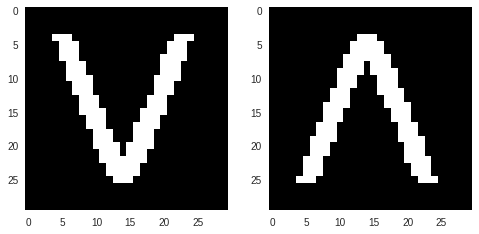

In [0]:
from skimage.io import imread
from matplotlib import pyplot as plt

# Lendo as duas imagens originais
V = imread("V.png", as_grey=True)
V_inv = imread("inv_V.png", as_grey=True)

# Figura vai ter 1 linha e 2 colunas
rows = 1
columns = 2
fig = plt.figure(figsize=(8, 8))

# Exibindo primeira imagem
fig.add_subplot(rows, columns, 1)
plt.grid(False)
plt.imshow(V)

# Exibindo segunda imagem
fig.add_subplot(rows, columns, 2)
plt.grid(False)
plt.imshow(V_inv)
plt.show()



---

- Dado o código acima, aplique ruído (random_nosie) no primeiro símbolo e rotacione (transform.rotate) em 25º o segundo símbolo antes de exibi-los.
  - Dica: Para o `random_noise` utilize parametro `mode='pepper' ` e  para `transform.rotate` utilize `preserve_range=True, mode='constant', cval=1`

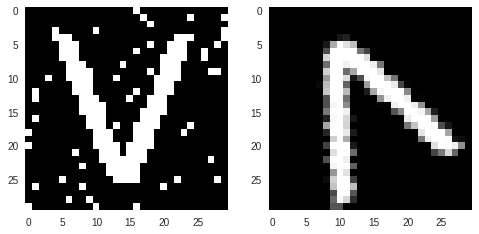

In [0]:
from skimage.util import random_noise
from skimage import transform


fig = plt.figure(figsize=(8, 8))
# Exibindo primeira imagem
p = random_noise(V , mode = "pepper")
fig.add_subplot(1, 2, 1)
plt.grid(False)
plt.imshow(p)

# Exibindo segunda imagem
q = transform.rotate(V_inv , preserve_range = True, mode = 'constant', cval = 1, angle = 25)
fig.add_subplot(1, 2, 2)
plt.grid(False)
plt.imshow(q)
plt.show()



---

- Agora defina a função `gen_data` abaixo. A função recebe como parâmetros: uma imagem base (v ou v invertido), a quantidade de dados artificiais a serem gerados, a classe da imagem base passada e uma lista de dados e labels. A função deve concatenar (`append`) as imagens geradas na lista `data` e suas respectivas classes na lista `target`.

  - Dica: Utilize a função `random.uniform(-a, a)` para gerar valores aleatórios entre -a e a para criar angulos de rotação variados.
  - Dica: Utilize valores diferentes para o parâmetro `seed` do random_noise para produzir resultados diferentes

In [0]:
import random
import math

def gen_data(base_image, quantity, label, data, target):
    for i in range(quantity):
      a = math.pi
      angle = random.uniform(-20, 20)
      image = transform.rotate(base_image , preserve_range = True, mode = 'constant', cval = 1, angle = angle)
      data.append(random_noise(image , mode = "pepper", seed = i))
      target.append(label)
    



---


- Edite a linha abaixo do comentário para exibir uma imagem 4x4 do dataset criado acima.

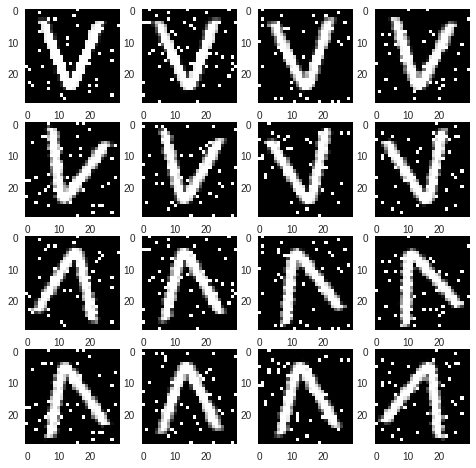

In [0]:
import numpy as np

x = []
y = []

gen_data(V, 8 , 0, x, y) #0 -> V
gen_data(V_inv, 8, 1, x, y) # 1 -> Vinv
x = np.asarray(x)
y = np.asarray(y)
fig = plt.figure(figsize=(8, 8))
############################
for i in range(16):
  fig.add_subplot(4, 4, i+1)
  plt.grid(False)
  plt.imshow(x[i])
plt.show()



---

- Separe o dataset criado em 12 imagens de treinamento e 4 imagens de teste utilizando a função `train_test_split`. Depois treine um classificador do tipo Perceptron no conjunto de treino. Calcule a acurácia para os conjuntos de treino e teste.

  - Dica: Você deve transformar as dimensões do conjunto de entrada para utilizar o Perceptron. Uma observação do conjunto é uma matriz 30x30. Para aplicar essa matriz no perceptron, você deve transformá-la em um vetor com 30x30 =900 elementos. Para isso utilize a função reshape da biblioteca numpy para transformar o conjunto x por inteiro.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score



#print(x[1].shape) 
x = x.reshape(16,900) 
#print(x[1].shape) 

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 4, train_size = 12, shuffle = True)

#print(train)

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
predicao = clf.predict(X_test)

accuracy_score(y_test,predicao)

1.0



---

Devido à natureza da função threshold, podemos ter uma falsa sensação de quê nosso classificador classifica os exemplos com a mesma confiança. Porém, isso não é verdadeiro. No caso do perceptron utilizado, podemos ter uma medida da confiança do classificador para um dado exemplo calculando a distância relativa desse exemplo para o hiperplano separador. Essa medida pode ser obtida através da função `decision_function(X)`

- Utilize a função  `decision_function(X)` para calcular a distância dos exemplos query0.png ~ query4.png ao hiperplano separador do classificador treinado no item anterior e analise a relação entre distância x confiança x qualidade do símbolo na imagem.

In [0]:
query = []

query.append(imread("query0.png", as_grey=True))
query.append(imread("query1.png", as_grey=True))
query.append(imread("query2.png", as_grey=True))
query.append(imread("query4.png", as_grey=True))

query = np.asarray(query)

query = query.reshape(4,900) 


clf.decision_function(query)

array([-0.75018393,  7.06146355, 21.37624557, -8.64080931])

Quanto maior a distância do ponto ao hiperplano, menor a qualidade do símbolo na imagem e consequentemente, menor a confiança da predição.